In [ ]:
pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-t1ung5kf
  Running command git clone --filter=blob:none --quiet https://github.com/slundberg/shap.git /tmp/pip-req-build-t1ung5kf
  Resolved https://github.com/slundberg/shap.git to commit bf0adf8c714c6f53186238e0cf365b73ca5b2160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# ANALISIS PREDICTIVO DE RESULTADOS FUTBOLISTICOS CON TECNICAS DE MACHINE LEARNING

In [2]:
#CARGA DE LIBRERIAS NECESARIAS
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import shap
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
#CLONADO DE LA CARPETA DE GITHUB CON LOS DATASET NECESARIOS PARA EL ANALISIS
!git clone "https://github.com/olatzi/tfm-unir-futbol.git"

Cloning into 'tfm-unir-futbol'...
remote: Enumerating objects: 1037, done.
remote: Counting objects: 100% (1037/1037), done.
remote: Compressing objects: 100% (842/842), done.
remote: Total 1037 (delta 248), reused 949 (delta 173), pack-reused 0
Receiving objects: 100% (1037/1037), 33.33 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (248/248), done.


# Visualización preliminar de los datos



In [4]:
#DESCARGA Y VISUALIZACION DEL DATA SET CON LA INFORMACIÓN DE PARTIDOS HISTORICOS DE LA LIGA ESPAÑOLA
url='/content/tfm-unir-futbol/datasets/EncuentrosLaLiga_MERGE_2011_2022_2.xlsx'

data=pd.read_excel(url)
data.head(5)

,MatchID,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,1,11-12,SP1,27/08/11,Granada,Betis,0,1,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11-12,SP1,27/08/11,Sp Gijon,Sociedad,1,2,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,11-12,SP1,27/08/11,Valencia,Santander,4,3,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,11-12,SP1,28/08/11,Ath Bilbao,Vallecano,1,1,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11-12,SP1,28/08/11,Ath Madrid,Osasuna,0,0,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#NOMBRE DE LAS VARIABLES EXISTENTES EN EL DATASET
variables=data.columns.values
print(variables)

['MatchID' 'Season' 'Div' 'Date' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR'
 'HTHG' 'HTAG' 'HTR' 'HS' 'AS' 'HST' 'AST' 'HF' 'AF' 'HC' 'AC' 'HY' 'AY'
 'HR' 'AR' 'B365H' 'B365D' 'B365A' 'BWH' 'BWD' 'BWA' 'GBH' 'GBD' 'GBA'
 'IWH' 'IWD' 'IWA' 'LBH' 'LBD' 'LBA' 'SBH' 'SBD' 'SBA' 'WHH' 'WHD' 'WHA'
 'SJH' 'SJD' 'SJA' 'VCH' 'VCD' 'VCA' 'BSH' 'BSD' 'BSA' 'Bb1X2' 'BbMxH'
 'BbAvH' 'BbMxD' 'BbAvD' 'BbMxA' 'BbAvA' 'BbOU' 'BbMx>2.5' 'BbAv>2.5'
 'BbMx<2.5' 'BbAv<2.5' 'BbAH' 'BbAHh' 'BbMxAHH' 'BbAvAHH' 'BbMxAHA'
 'BbAvAHA' 'PSH' 'PSD' 'PSA' 'PSCH' 'PSCD' 'PSCA' 'Time' 'MaxH' 'MaxD'
 'MaxA' 'AvgH' 'AvgD' 'AvgA' 'B365>2.5' 'B365<2.5' 'P>2.5' 'P<2.5'
 'Max>2.5' 'Max<2.5' 'Avg>2.5' 'Avg<2.5' 'AHh' 'B365AHH' 'B365AHA' 'PAHH'
 'PAHA' 'MaxAHH' 'MaxAHA' 'AvgAHH' 'AvgAHA' 'B365CH' 'B365CD' 'B365CA'
 'BWCH' 'BWCD' 'BWCA' 'IWCH' 'IWCD' 'IWCA' 'WHCH' 'WHCD' 'WHCA' 'VCCH'
 'VCCD' 'VCCA' 'MaxCH' 'MaxCD' 'MaxCA' 'AvgCH' 'AvgCD' 'AvgCA' 'B365C>2.5'
 'B365C<2.5' 'PC>2.5' 'PC<2.5' 'MaxC>2.5' 'MaxC<2.5' 'AvgC>2.5' 'AvgC<

    FTR  porcentaje
H  1935   46.291866
A  1188   28.421053
D  1057   25.287081


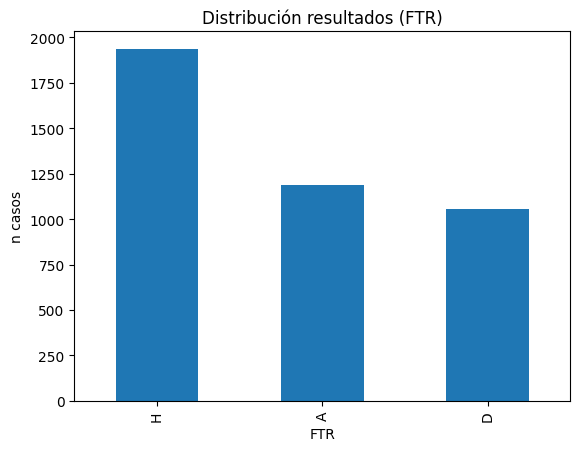

In [6]:
#NUMERO DE EVENTOS POR CADA CATEGORIA DE LA VARIABLE DEPENDIENTE FTR
#H: HOME WIN
#D: DRAW (EMPATE)
#A: AWAY WIN
tabla_frecuencia = pd.DataFrame(data['FTR'].value_counts())
tabla_frecuencia['porcentaje'] = tabla_frecuencia['FTR'] / len(data) * 100
print(tabla_frecuencia)


data['FTR'].value_counts().plot(kind='bar')
plt.xlabel('FTR')
plt.ylabel('n casos')
plt.title('Distribución resultados (FTR)')
plt.show()

In [7]:
#SELECCION, VISUALIZACIÓN E INFORMACIÓN DE LAS VARIABLES INDEPENDIENTES UTILIZADAS PARA PREDECIR LA VARIABLE DEPENDIENTE

data_mod=data.iloc[:,0:24]

data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MatchID   4180 non-null   int64 
 1   Season    4180 non-null   object
 2   Div       4180 non-null   object
 3   Date      4180 non-null   object
 4   HomeTeam  4180 non-null   object
 5   AwayTeam  4180 non-null   object
 6   FTHG      4180 non-null   int64 
 7   FTAG      4180 non-null   int64 
 8   FTR       4180 non-null   object
 9   HTHG      4180 non-null   int64 
 10  HTAG      4180 non-null   int64 
 11  HTR       4180 non-null   object
 12  HS        4180 non-null   int64 
 13  AS        4180 non-null   int64 
 14  HST       4180 non-null   int64 
 15  AST       4180 non-null   int64 
 16  HF        4180 non-null   int64 
 17  AF        4180 non-null   int64 
 18  HC        4180 non-null   int64 
 19  AC        4180 non-null   int64 
 20  HY        4180 non-null   int64 
 21  AY        4180

In [8]:
#CODIFICACIÓN DE LAS VARIABLES NOMINALES EN CATEGORIAS
data_mod['Result']=LabelEncoder().fit_transform(data_mod['FTR'])
data_mod['Home']=LabelEncoder().fit_transform(data_mod['HomeTeam'])
data_mod['Away']=LabelEncoder().fit_transform(data_mod['AwayTeam'])
data_mod['Temporada']=LabelEncoder().fit_transform(data_mod['Season'])

data_mod.head(15)

,MatchID,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HC,AC,HY,AY,HR,AR,Result,Home,Away,Temporada
0,1,11-12,SP1,27/08/11,Granada,Betis,0,1,A,0,...,8,5,2,2,0,0,0,14,5,0
1,2,11-12,SP1,27/08/11,Sp Gijon,Sociedad,1,2,A,0,...,9,2,2,1,1,1,0,27,26,0
2,3,11-12,SP1,27/08/11,Valencia,Santander,4,3,H,1,...,10,3,3,3,0,0,2,28,24,0
3,4,11-12,SP1,28/08/11,Ath Bilbao,Vallecano,1,1,D,0,...,9,4,1,3,0,0,1,2,30,0
4,5,11-12,SP1,28/08/11,Ath Madrid,Osasuna,0,0,D,0,...,12,5,1,0,0,0,1,3,22,0
5,6,11-12,SP1,28/08/11,Getafe,Levante,1,1,D,0,...,1,4,5,3,0,0,1,12,19,0
6,7,11-12,SP1,28/08/11,Mallorca,Espanol,1,0,H,0,...,5,4,2,3,0,0,2,21,11,0
7,8,11-12,SP1,28/08/11,Sevilla,Malaga,2,1,H,2,...,2,8,3,1,0,0,2,25,20,0
8,9,11-12,SP1,28/08/11,Zaragoza,Real Madrid,0,6,A,0,...,7,9,2,1,0,0,0,32,23,0
9,10,11-12,SP1,29/08/11,Barcelona,Villarreal,5,0,H,2,...,12,0,3,3,0,0,2,4,31,0


In [9]:
#SELECCION FINAL DE LAS VARIABLES INDEPENDIENTES DEL MODELO (X)
x=data_mod.drop(['MatchID','Season','Div','Date','FTR','Result','HTR','FTHG','FTAG','HTHG','HTAG','HomeTeam','AwayTeam'], axis=1)
x.head()
x.info()

print(x.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   HS         4180 non-null   int64
 1   AS         4180 non-null   int64
 2   HST        4180 non-null   int64
 3   AST        4180 non-null   int64
 4   HF         4180 non-null   int64
 5   AF         4180 non-null   int64
 6   HC         4180 non-null   int64
 7   AC         4180 non-null   int64
 8   HY         4180 non-null   int64
 9   AY         4180 non-null   int64
 10  HR         4180 non-null   int64
 11  AR         4180 non-null   int64
 12  Home       4180 non-null   int64
 13  Away       4180 non-null   int64
 14  Temporada  4180 non-null   int64
dtypes: int64(15)
memory usage: 490.0 KB
['HS' 'AS' 'HST' 'AST' 'HF' 'AF' 'HC' 'AC' 'HY' 'AY' 'HR' 'AR' 'Home'
 'Away' 'Temporada']


# Matriz de correlación variables numéricas

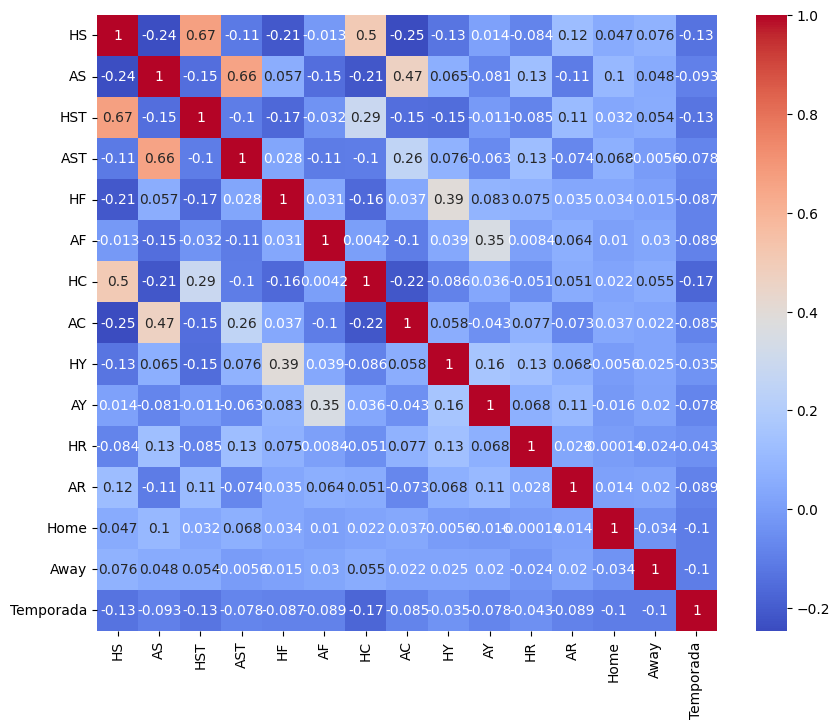

In [ ]:
#ANALISIS DE CORRELACION DE LAS VARIABLES NUMERICAS INDEPENDIENTES
variables_numericas = x.select_dtypes(include=['int64'])
variables_numericas.describe()

matriz_correlacion=variables_numericas.corr()
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

# Selección variables dependientes e independiente

In [10]:
#SELECCION FINAL DE LA VARUABLE DEPENDIENTE (Y)
y=data_mod['Result']
print(y)

0       0
1       0
2       2
3       1
4       1
       ..
4175    1
4176    0
4177    0
4178    2
4179    0
Name: Result, Length: 4180, dtype: int64


In [11]:
#ESTANDARIZACIÓN DE LAS VARIABLES INDEPENDIENTES NUMERICAS
vars_to_standardize = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR','AR']
scaler = StandardScaler()
x_standar_prev = scaler.fit_transform(x[vars_to_standardize])
print(x_standar_prev)


x_standar_prev2=pd.DataFrame(x_standar_prev, columns= 'HS AS HST AST HF AF HC AC HY AY HR AR'.split())
print(x_standar_prev2)

vars_sin = ['Home','Away','Temporada']

x_standar = pd.concat([x_standar_prev2, x[vars_sin]], axis=1)

print(x_standar)


[[-0.48341548  1.66717957 -1.06193068 ... -0.44640305 -0.34390876
  -0.37587549]
 [ 0.72355916 -1.05332946 -0.29435844 ... -1.10552166  2.56608841
   2.28260092]
 [ 2.53402112 -1.50674763  2.39214437 ...  0.21271555 -0.34390876
  -0.37587549]
 ...
 [ 0.12007184 -1.50674763 -0.67814456 ... -1.10552166 -0.34390876
  -0.37587549]
 [-0.0810906  -0.37320221 -0.67814456 ...  0.21271555 -0.34390876
  -0.37587549]
 [-0.28225304 -1.05332946 -0.67814456 ... -0.44640305 -0.34390876
  -0.37587549]]
            HS        AS       HST       AST        HF        AF        HC  \
0    -0.483415  1.667180 -1.061931 -0.337087 -0.449789  0.530127  0.814941   
1     0.723559 -1.053329 -0.294358 -0.792787  0.019771 -0.651324  1.158196   
2     2.534021 -1.506748  2.392144 -0.337087  0.019771 -0.651324  1.501450   
3    -0.684578  0.533634 -0.294358  1.030013  0.724111  1.238997  1.158196   
4     2.936346  1.213761  1.240786 -0.792787 -1.154128 -1.360195  2.187958   
...        ...       ...       ...      

# División train-test split

In [ ]:
#DIVISION DEL DATA SET SEGUN TRAIN-TEST SPLIT EN UN 75% PARA ENTRENAR Y UN 25% PARA TESTEAR
X_train, X_test, y_train, y_test = train_test_split(x_standar, y, test_size=0.25, random_state=50)

# Definición ténicas de ML empleadas

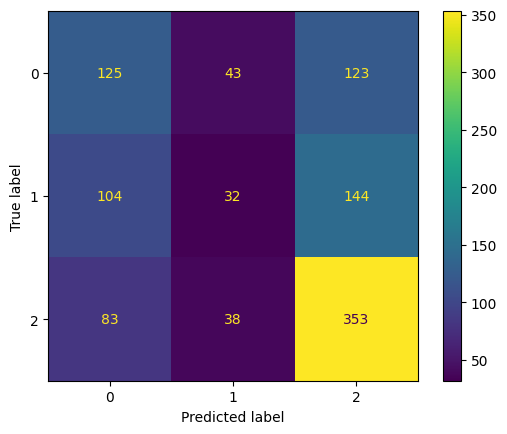

In [ ]:
#DEFINICION DE LOS 3 ALGORITMOS DE MACHINE LEARNING PROBADOS
#1: REGRESIÓN LOGISTICA

model1 = LogisticRegression(class_weight='balanced', max_iter=1000)


#2: RANDOM FOREST

model2 = RandomForestClassifier(criterion="gini", max_depth=None, max_features=None,
                                class_weight='balanced', n_estimators = 100, random_state = 42)


#3: RED NEURONAL

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#4: KNN

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model4 = KNeighborsClassifier(n_neighbors=15)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, y_pred)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print(confusion2)

# Mostrar el gráfico
plt.show()

#5: k-means

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)

## EVALUACIÓN DE REGRESIÓN LOGISTICA

In [ ]:
# Entrenar el modelo utilizando los datos de entrenamiento normalizados
model1.fit(X_train, y_train)


# Realizar predicciones utilizando los datos de prueba normalizados
y_test_pred = model1.predict(X_test)


#METRICAS EVALUADAS
confusion = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión test:\n", confusion)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_test_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score:", f1)

logloss = log_loss(y_test, model1.predict_proba(X_test))
print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)


print(classification_report(y_test, model1.predict(X_test)))

     Variable  Coeficiente
0          HS     0.202679
1          AS    -0.284709
2         HST    -0.710954
3         AST     0.957563
4          HF     0.000237
5          AF    -0.012667
6          HC     0.173206
7          AC    -0.181397
8          HY     0.108553
9          AY    -0.029538
10         HR     0.129499
11         AR    -0.140444
12       Home     0.004464
13       Away    -0.001342
14  Temporada    -0.000920


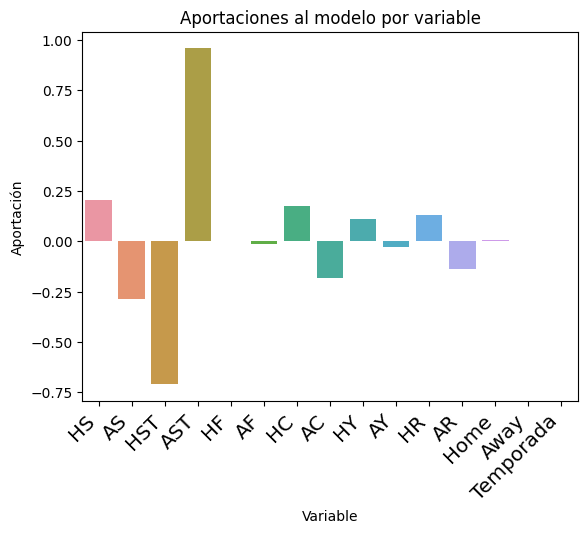

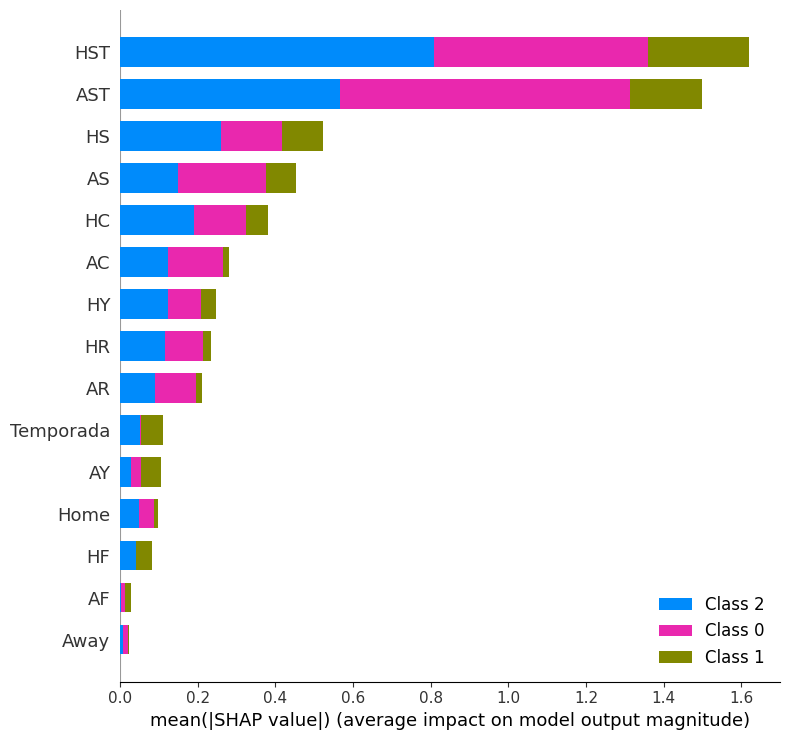

In [ ]:
#TECNICAS DE EXPLICABILIDAD

###1: BETAS
betas = model1.coef_[0]
variables = x.columns

# Crear un DataFrame con los coeficientes y las variables
df_coeficientes = pd.DataFrame({'Variable': variables, 'Coeficiente': betas})

# Imprimir el DataFrame de coeficientes
print(df_coeficientes)

#visualizacion

# Crear un diagrama de barras
sns.barplot(x=df_coeficientes.Variable, y=df_coeficientes.Coeficiente)
# agregar estiquestas

plt.xlabel("Variable")
plt.ylabel("Aportación")
plt.title("Aportaciones al modelo por variable")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()



###2: SHAP
explainer = shap.Explainer(model1, X_train)
shap_values = explainer.shap_values(X_test)

# visualizacion
shap.summary_plot(shap_values,X_test)


In [ ]:
#CROSS VALIDATION
#n particiones
k=10

# Realizar la validación cruzada
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model1, x_standar, y, cv=k, scoring='accuracy')

# Calcular la matriz de confusión
y_pred = cross_val_predict(model1, x_standar, y, cv=k)
confusion = confusion_matrix(y, y_pred)

# Calcular las métricas
accuracy = scores.mean()

precision = cross_val_score(model1, x_standar, y, cv=k, scoring='precision_macro').mean()
logloss = cross_val_score(model1, x_standar, y, cv=k, scoring='neg_log_loss').mean()
recall = cross_val_score(model1, x_standar, y, cv=k, scoring='recall_macro').mean()
f1 = cross_val_score(model1, x_standar, y, cv=k, scoring='f1_macro').mean()
classification_error = 1 - accuracy

# Imprimir las métricas y la matriz de confusión
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Log Loss:", logloss)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Error:", classification_error)


Confusion Matrix:
 [[ 746  297  145]
 [ 304  448  305]
 [ 214  456 1265]]
Accuracy: 0.5882775119617225
Precision: 0.5694465187699971
Log Loss: -0.8717428563366288
Recall: 0.5683946764993608
F1-score: 0.5640415307694475
Classification Error: 0.4117224880382775


## EVALUACIÓN DE RANDOM FOREST

In [ ]:
model2.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)



#METRICAS EVALUADAS
confusion = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión test:\n", confusion)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_test_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score:", f1)

logloss = log_loss(y_test, model2.predict_proba(X_test))
print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)


print(classification_report(y_test, model2.predict(X_test)))

Matriz de confusión test:
 [[188  35  68]
 [ 85  62 133]
 [ 53  58 363]]
Accuracy: 0.5866028708133971
Precision: 0.5597037502443557
Recall: 0.5866028708133971
F1 Score: 0.5633278448249829
Log Loss: 0.9177750690189478
Classification Error: 0.4133971291866029
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       291
           1       0.40      0.22      0.29       280
           2       0.64      0.77      0.70       474

    accuracy                           0.59      1045
   macro avg       0.54      0.54      0.53      1045
weighted avg       0.56      0.59      0.56      1045



      feature  importance
2         HST    0.114407
3         AST    0.113779
13       Away    0.084619
12       Home    0.083182
0          HS    0.074963
4          HF    0.072755
5          AF    0.071484
1          AS    0.071024
6          HC    0.070637
7          AC    0.063767
14  Temporada    0.058595
8          HY    0.049477
9          AY    0.046814
11         AR    0.012677
10         HR    0.011819


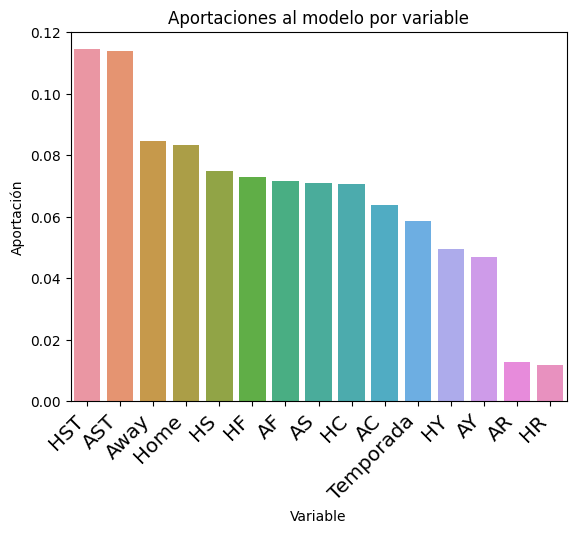

100%|===================| 3121/3135 [02:05<00:00]       

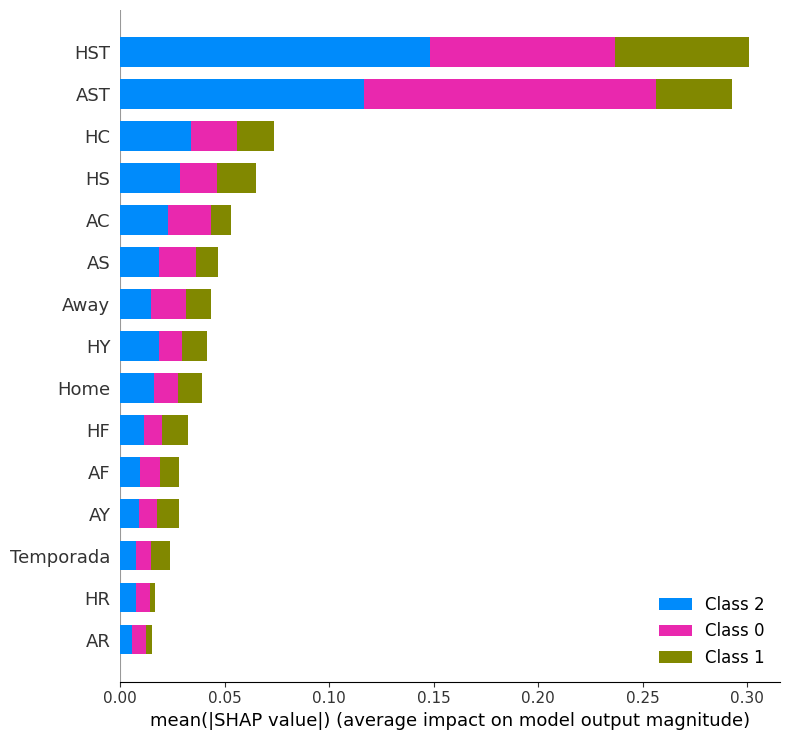

In [ ]:
#features
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": model2.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
print(feature_importances_df)

#visualizacion

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Variable")
plt.ylabel("Aportación")
plt.title("Aportaciones al modelo por variable")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()




###2: SHAP
explainer = shap.Explainer(model2, X_train)
shap_values = explainer.shap_values(X_test,check_additivity=False)

# visualizacion
shap.summary_plot(shap_values,X_test)

In [ ]:
#VALIDACION CRUZADA
#n particiones
k=10

# Realizar la validación cruzada

scores = cross_val_score(model2, x_standar, y, cv=k, scoring='accuracy')

# Calcular la matriz de confusión
y_pred = cross_val_predict(model2, x_standar, y, cv=k)
confusion = confusion_matrix(y, y_pred)

# Calcular las métricas
accuracy = scores.mean()

precision = cross_val_score(model2, x_standar, y, cv=k, scoring='precision_macro').mean()
logloss = cross_val_score(model2, x_standar, y, cv=k, scoring='neg_log_loss').mean()
recall = cross_val_score(model2, x_standar, y, cv=k, scoring='recall_macro').mean()
f1 = cross_val_score(model2, x_standar, y, cv=k, scoring='f1_macro').mean()
classification_error = 1 - accuracy

# Imprimir las métricas y la matriz de confusión
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Log Loss:", logloss)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Error:", classification_error)

Confusion Matrix:
 [[ 736  170  282]
 [ 311  243  503]
 [ 214  178 1543]]
Accuracy: 0.6033492822966507
Precision: 0.5567481880769307
Log Loss: -0.8965427102885786
Recall: 0.54890087867536
F1-score: 0.5391799680913463
Classification Error: 0.39665071770334925


## EVALUACION RED NEURONAL

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history= model3.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model3.evaluate(X_test, y_test)

print('Model Evaluate Loss:      ', test_loss)
print('Model Evaluate Accuracy:  ', test_acc)

Epoch 1/30
49/49 [==============================] - 2s 9ms/step - loss: 1.3985 - accuracy: 0.4290 - val_loss: 1.0738 - val_accuracy: 0.4871
Epoch 2/30
49/49 [==============================] - 0s 4ms/step - loss: 1.0043 - accuracy: 0.5069 - val_loss: 1.0105 - val_accuracy: 0.5206
Epoch 3/30
49/49 [==============================] - 0s 4ms/step - loss: 0.9668 - accuracy: 0.5327 - val_loss: 0.9954 - val_accuracy: 0.5407
Epoch 4/30
49/49 [==============================] - 0s 4ms/step - loss: 0.9333 - accuracy: 0.5509 - val_loss: 0.9621 - val_accuracy: 0.5416
Epoch 5/30
49/49 [==============================] - 0s 4ms/step - loss: 0.8964 - accuracy: 0.5825 - val_loss: 0.9403 - val_accuracy: 0.5598
Epoch 6/30
49/49 [==============================] - 0s 3ms/step - loss: 0.8676 - accuracy: 0.6019 - val_loss: 0.9408 - val_accuracy: 0.5665
Epoch 7/30
49/49 [==============================] - 0s 4ms/step - loss: 0.8460 - accuracy: 0.6195 - val_loss: 0.9113 - val_accuracy: 0.5684
Epoch 8/30
49/49 [==

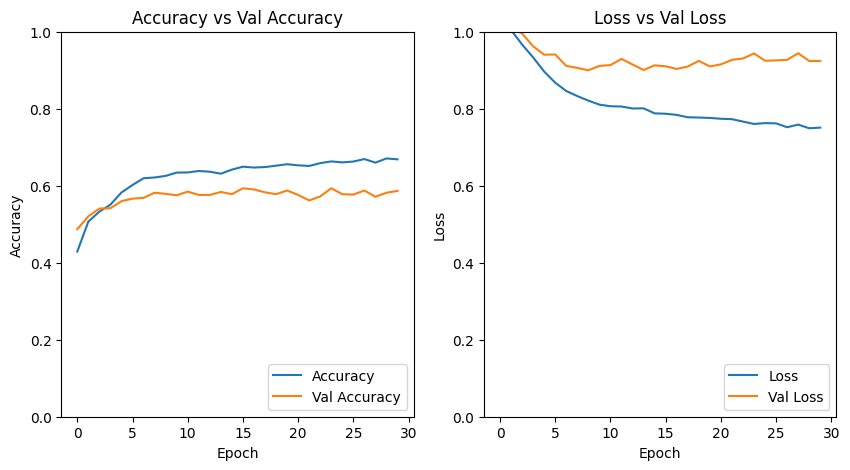

In [ ]:
# 3. Visualizamos la diferencia entre ambas redes
# ---------------------------------------------------
plt.figure(figsize=(10,5))
# 1. Visualizamos Accuracy y val_Acurracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Accuracy', 'Val Accuracy'], loc='lower right')

# 1. Visualizamos loss y val_loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Val Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Loss', 'Val Loss'], loc='lower right')

In [ ]:
# Crear un explainer SHAP basado en el modelo
explainer = shap.Explainer(model3,X_train)

# Calcular las importancias de características
shap_values = explainer.shap_values(X_test)

# Imprimir las importancias de características
shap.summary_plot(shap_values,X_test)

0     0.321234 -0.826620 -0.678145 -0.337087 -0.215009  0.057546  3.217721   
1     0.723559 -1.280039  1.624572 -1.248487 -1.154128 -0.887614  0.814941   
2     1.125884 -1.053329  0.857000 -0.792787 -0.449789  0.530127 -0.214821   
3     0.120072  0.987052 -0.294358 -0.337087 -1.154128  1.711577 -0.558075   
4    -0.483415  0.080216  0.857000  0.574313 -0.684569 -1.360195 -0.214821   
...        ...       ...       ...       ...       ...       ...       ...   
3067  1.125884  0.760343  0.857000  1.030013 -0.215009  1.002707  0.471687   
3070  0.924722 -0.146493  0.473214 -0.337087  0.254551  0.530127  0.814941   
3087 -0.684578  0.533634 -0.678145  1.485713  0.254551 -0.887614 -0.558075   
3094 -0.081091 -0.373202  0.857000 -0.337087  0.254551 -0.651324  0.128433   
3096 -0.483415  1.213761  0.089428  0.574313  0.958890  2.656738 -1.931092   

            AC        HY        AY        HR        AR  Home  Away  Temporada  
0    -0.145816  1.029044  2.190071 -0.343909 -0.375875   2.0 

AttributeError: ignored

In [ ]:
y_test_pred = model3.predict(X_test)

y_pred_classes = np.argmax(y_test_pred, axis=1)

#METRICAS EVALUADAS
confusion = confusion_matrix(y_test, y_pred_classes)
print("Matriz de confusión test:\n", confusion)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("F1 Score:", f1)

#logloss = log_loss(y_test, model3.predict_proba(X_test))
#print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)



33/33 [==============================] - 0s 1ms/step
Matriz de confusión test:
 [[162  55  74]
 [ 57  82 141]
 [ 45  60 369]]
Accuracy: 0.5866028708133971
Precision: 0.5690076368525372
Recall: 0.5866028708133971
F1 Score: 0.5710857278249991
Classification Error: 0.4133971291866029


In [ ]:
#VALIDACION CRUZADA
model3 = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

x_standar_reset = x_standar.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(x_standar, y)
foldNum=0

accuracy_scores = []  # Lista para almacenar los valores de accuracy
precision_scores = []  # Lista para almacenar los valores de precisión
recall_scores = [] # Lista para almacenar los valores de recall
sensitivity_scores = []  # Lista para almacenar los valores de sensibilidad


for train_index, val_index in skf.split(x_standar,y):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = x_standar.iloc[train_index,:], x_standar.iloc[val_index,:]
    Y_train, Y_val = y.iloc[train_index], y.iloc[val_index]

    history = model3.fit(X_train, Y_train,
                        validation_data = (X_val, Y_val),
                        epochs=30,
                        batch_size=64)
    yPredict = model3.predict(X_val)
    test_loss, test_acc = model3.evaluate(X_val, Y_val)
    print('Model Evaluate Loss:      ', test_loss)
    print('Model Evaluate Accuracy:  ', test_acc)


    y_pred_classes = np.argmax(yPredict, axis=1)  # Convertir las probabilidades a clases predichas
    accuracy_scores.append(test_acc)
    precision_scores.append(precision_score(Y_val, y_pred_classes, average='weighted'))
    recall_scores.append(recall_score(Y_val, y_pred_classes, average='weighted'))
    sensitivity_scores.append(f1_score(Y_val, y_pred_classes, average='weighted'))

print("Accuracy  Media : ", np.mean(accuracy_scores))
print("Precision Media  : ", np.mean(precision_scores))
print("Precision Media : ", np.mean(recall_scores))
print("Sensitivity Media : ", np.mean(sensitivity_scores))





Results for fold 1
Epoch 1/30


ValueError: ignored

## DATA AUMENTATION

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2800) in class 0 will be larger than the number of samples in the majority class (class #2 -> 1935)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2900) in class 1 will be larger than the number of samples in the majority class (class #2 -> 1935)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2200) in class 2 will be larger than the number of samples in the majority class (class #2 -> 1935)
  warnings.warn(


      y  porcentaje
2  4135   34.230132
0  3988   33.013245
1  3957   32.756623


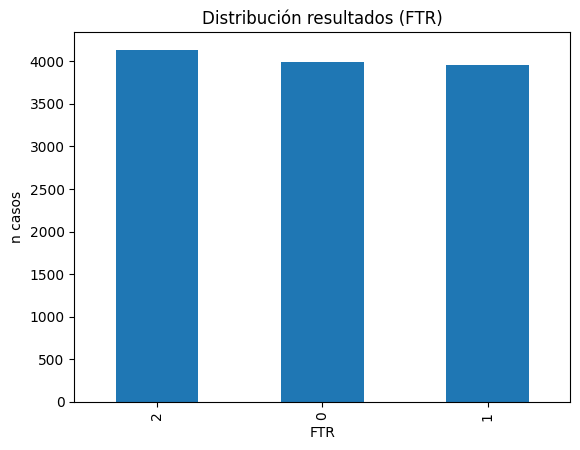

In [12]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

pesos = {0: 2800, 1: 2900, 2: 2200}


# Aplicar SMOTE con los pesos
smote = SMOTE(sampling_strategy=pesos, random_state=42)
X_synthetic, y_synthetic = smote.fit_resample(x_standar, y)

# Añadir las muestras sintéticas a los datos originales
x_standar_synthetic = np.vstack([x_standar, X_synthetic])
y_synthetic = np.hstack([y, y_synthetic])

# Crear una variable para identificar las muestras sintéticas
ficticio = np.hstack([np.zeros(len(x_standar)), np.ones(len(X_synthetic))])

# Crear un nuevo dataframe con los datos originales y sintéticos
df_synthetic = pd.DataFrame(x_standar_synthetic, columns=x_standar.columns)
df_synthetic['y'] = y_synthetic
df_synthetic['ficticio'] = ficticio

# Verificar el balance de las categorías después de la generación de muestras sintéticas
#H=2: HOME WIN
#D=1: DRAW (EMPATE)
#A=0: AWAY WIN
tabla_frecuencia = pd.DataFrame(df_synthetic['y'].value_counts())
tabla_frecuencia['porcentaje'] = tabla_frecuencia / len(df_synthetic) * 100
print(tabla_frecuencia)

df_synthetic['y'].value_counts().plot(kind='bar')
plt.xlabel('FTR')
plt.ylabel('n casos')
plt.title('Distribución resultados (FTR)')
plt.show()

In [13]:
#SELECCION, VISUALIZACIÓN E INFORMACIÓN DE LAS VARIABLES INDEPENDIENTES UTILIZADAS PARA PREDECIR LA VARIABLE DEPENDIENTE

df_synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HS         12080 non-null  float64
 1   AS         12080 non-null  float64
 2   HST        12080 non-null  float64
 3   AST        12080 non-null  float64
 4   HF         12080 non-null  float64
 5   AF         12080 non-null  float64
 6   HC         12080 non-null  float64
 7   AC         12080 non-null  float64
 8   HY         12080 non-null  float64
 9   AY         12080 non-null  float64
 10  HR         12080 non-null  float64
 11  AR         12080 non-null  float64
 12  Home       12080 non-null  float64
 13  Away       12080 non-null  float64
 14  Temporada  12080 non-null  float64
 15  y          12080 non-null  int64  
 16  ficticio   12080 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 1.6 MB


In [14]:
#DIVISION DEL DATA SET SEGUN TRAIN-TEST SPLIT EN UN 75% PARA ENTRENAR Y UN 25% PARA TESTEAR
X_train2, X_test2, y_train, y_test = train_test_split(df_synthetic.drop(['y'], axis=1), df_synthetic['y'], test_size=0.25, random_state=50)

X_train=X_train2.drop(['ficticio'],axis=1)
X_test=X_test2.drop(['ficticio'], axis=1)

### EVALUACION REGRESION LOGISTICA

Accuracy: 0.6003311258278146
Precision: 0.6010627528252452
Recall: 0.6003311258278146
F1 Score: 0.6006783434273376
Log Loss: 0.8466641578260441
Classification Error: 0.39966887417218544
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1007
           1       0.47      0.48      0.48       956
           2       0.66      0.66      0.66      1057

    accuracy                           0.60      3020
   macro avg       0.60      0.60      0.60      3020
weighted avg       0.60      0.60      0.60      3020

Matriz de confusión test:


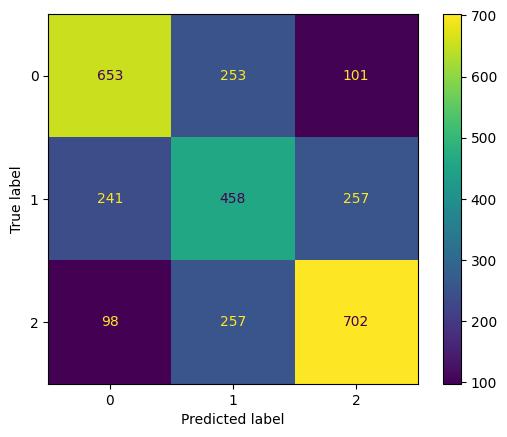

In [ ]:
# Entrenar el modelo utilizando los datos de entrenamiento normalizados
model1.fit(X_train, y_train)


# Realizar predicciones utilizando los datos de prueba normalizados
y_test_pred = model1.predict(X_test)


#METRICAS EVALUADAS

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_test_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score:", f1)

logloss = log_loss(y_test, model1.predict_proba(X_test))
print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)


print(classification_report(y_test, model1.predict(X_test)))

confusion = confusion_matrix(y_test, y_test_pred)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)

     Variable  Coeficiente
0          HS     0.180425
1          AS    -0.339322
2         HST    -0.766844
3         AST     1.084758
4          HF    -0.014143
5          AF     0.007172
6          HC     0.211480
7          AC    -0.171364
8          HY     0.041551
9          AY     0.004659
10         HR     0.129368
11         AR    -0.137727
12       Home     0.003652
13       Away    -0.003014
14  Temporada     0.000717


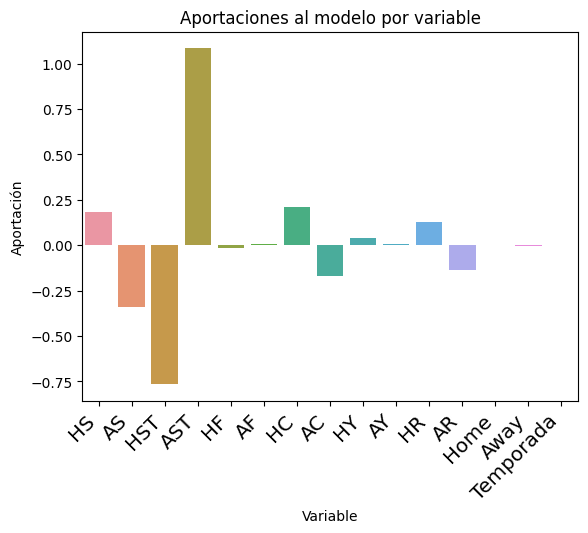

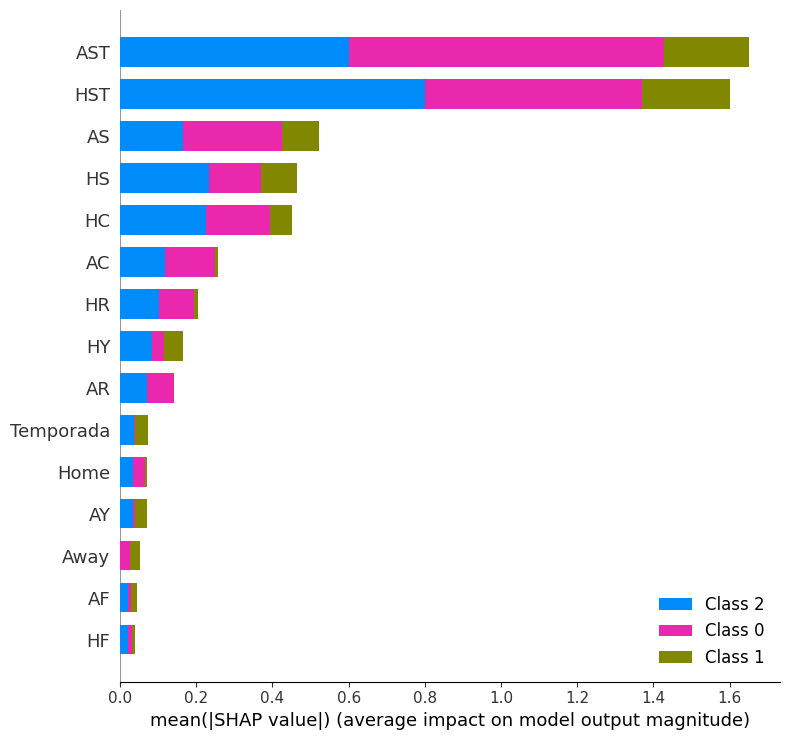

In [ ]:
#TECNICAS DE EXPLICABILIDAD

###1: BETAS
betas = model1.coef_[0]
variables = x.columns

# Crear un DataFrame con los coeficientes y las variables
df_coeficientes = pd.DataFrame({'Variable': variables, 'Coeficiente': betas})

# Imprimir el DataFrame de coeficientes
print(df_coeficientes)

#visualizacion

# Crear un diagrama de barras
sns.barplot(x=df_coeficientes.Variable, y=df_coeficientes.Coeficiente)
# agregar estiquestas

plt.xlabel("Variable")
plt.ylabel("Aportación")
plt.title("Aportaciones al modelo por variable")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()



###2: SHAP
explainer = shap.Explainer(model1, X_train)
shap_values = explainer.shap_values(X_test)

# visualizacion
shap.summary_plot(shap_values,X_test)

Accuracy: 0.5853476821192054
Precision: 0.5970093297446506
Log Loss: -0.890174535186776
Recall: 0.5843442660541248
F1-score: 0.5722476334276828
Classification Error: 0.4146523178807946
Matriz de confusión test:


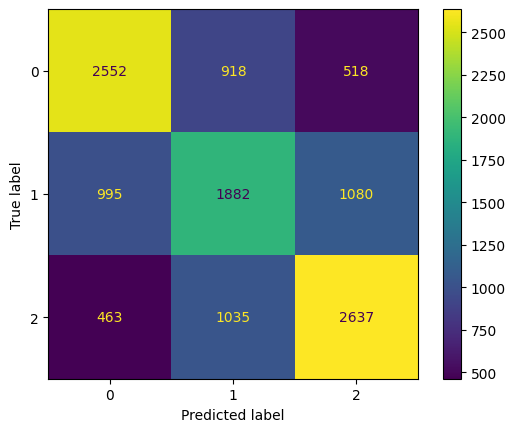

In [ ]:
#CROSS VALIDATION

# n particiones
k=10
scores = cross_val_score(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='accuracy')
y_pred = cross_val_predict(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k)


# Calcular las métricas
accuracy = scores.mean()

precision = cross_val_score(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='precision_macro').mean()
logloss = cross_val_score(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='neg_log_loss').mean()
recall = cross_val_score(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='recall_macro').mean()
f1 = cross_val_score(model1, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='f1_macro').mean()
classification_error = 1 - accuracy

# Imprimir las métricas y la matriz de confusión
#print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Log Loss:", logloss)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Error:", classification_error)

confusion = confusion_matrix(df_synthetic['y'], y_pred)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)


### EVALUACION RANDOM FOREST

Accuracy: 0.890728476821192
Precision: 0.891480759222911
Recall: 0.890728476821192
F1 Score: 0.8909748743851743
Log Loss: 0.38373112066651205
Classification Error: 0.10927152317880795
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1007
           1       0.84      0.87      0.86       956
           2       0.92      0.91      0.92      1057

    accuracy                           0.89      3020
   macro avg       0.89      0.89      0.89      3020
weighted avg       0.89      0.89      0.89      3020

Matriz de confusión test:


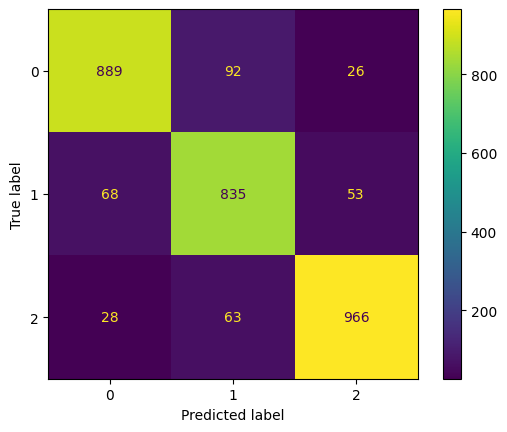

In [ ]:
model2.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)



#METRICAS EVALUADAS

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_test_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score:", f1)

logloss = log_loss(y_test, model2.predict_proba(X_test))
print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)


print(classification_report(y_test, model2.predict(X_test)))

confusion = confusion_matrix(y_test, y_test_pred)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)

      feature  importance
3         AST    0.146716
2         HST    0.132004
6          HC    0.074314
12       Home    0.072576
13       Away    0.071042
0          HS    0.070433
4          HF    0.067508
5          AF    0.065072
1          AS    0.064621
7          AC    0.059729
8          HY    0.051483
9          AY    0.050168
14  Temporada    0.049012
10         HR    0.014622
11         AR    0.010700


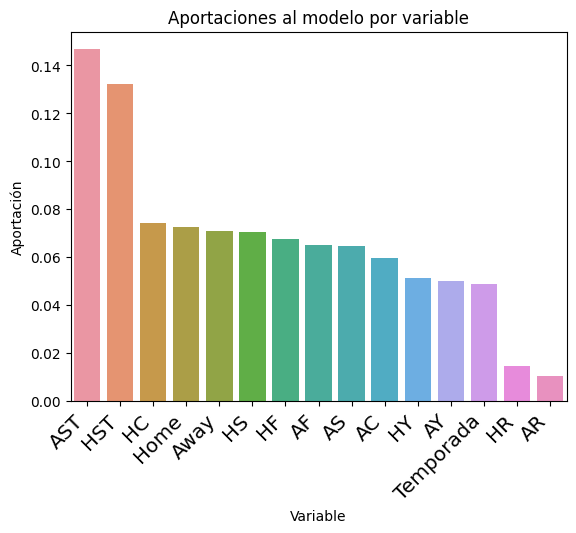

100%|===================| 9038/9060 [04:37<00:00]       

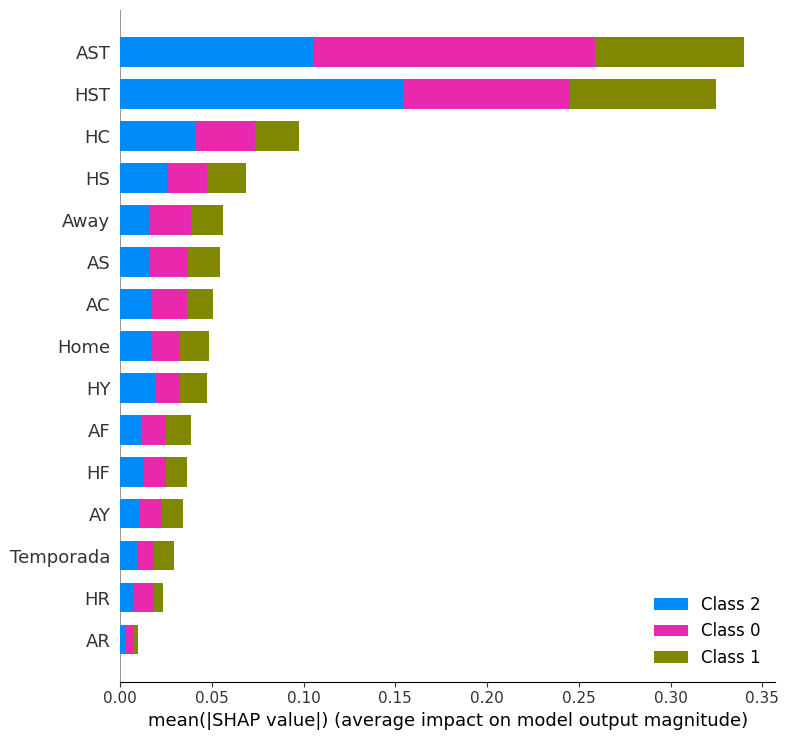

In [ ]:
#features
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": model2.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
print(feature_importances_df)

#visualizacion

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Variable")
plt.ylabel("Aportación")
plt.title("Aportaciones al modelo por variable")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

###2: SHAP
explainer = shap.Explainer(model2, X_train)
shap_values = explainer.shap_values(X_test,check_additivity=False)

# visualizacion
shap.summary_plot(shap_values,X_test)

Accuracy: 0.9336920529801324
Precision: 0.9401039307402375
Log Loss: -0.36127395960772274
Recall: 0.933399696982599
F1-score: 0.9339072937776794
Classification Error: 0.06630794701986764
Matriz de confusión test:


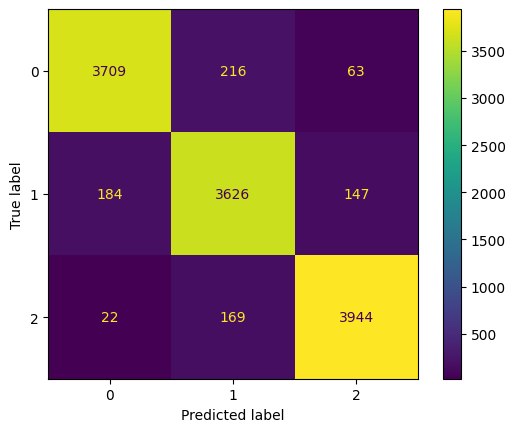

In [ ]:
# CROSS VALIDATION
#n particiones
k=10

# Realizar la validación cruzada

scores = cross_val_score(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='accuracy')

# Calcular la matriz de confusión
y_pred = cross_val_predict(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k)


# Calcular las métricas
accuracy = scores.mean()

precision = cross_val_score(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='precision_macro').mean()
logloss = cross_val_score(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='neg_log_loss').mean()
recall = cross_val_score(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='recall_macro').mean()
f1 = cross_val_score(model2, df_synthetic.drop(['y'], axis=1), df_synthetic['y'], cv=k, scoring='f1_macro').mean()
classification_error = 1 - accuracy

# Imprimir las métricas y la matriz de confusión

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Log Loss:", logloss)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Error:", classification_error)

confusion = confusion_matrix(df_synthetic['y'], y_pred)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)

### EVALUACION RED NEURONAL

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history= model3.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model3.evaluate(X_test, y_test)

print('Model Evaluate Loss:      ', test_loss)
print('Model Evaluate Accuracy:  ', test_acc)

Epoch 1/30
142/142 [==============================] - 1s 3ms/step - loss: 1.0565 - accuracy: 0.4672 - val_loss: 0.9512 - val_accuracy: 0.5298
Epoch 2/30
142/142 [==============================] - 0s 2ms/step - loss: 0.9015 - accuracy: 0.5714 - val_loss: 0.8609 - val_accuracy: 0.5844
Epoch 3/30
142/142 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.5956 - val_loss: 0.8452 - val_accuracy: 0.6000
Epoch 4/30
142/142 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.5981 - val_loss: 0.8450 - val_accuracy: 0.6053
Epoch 5/30
142/142 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.6023 - val_loss: 0.8554 - val_accuracy: 0.5983
Epoch 6/30
142/142 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.6087 - val_loss: 0.8208 - val_accuracy: 0.6106
Epoch 7/30
142/142 [==============================] - 0s 2ms/step - loss: 0.8252 - accuracy: 0.6127 - val_loss: 0.8345 - val_accuracy: 0.6076
Epoch 

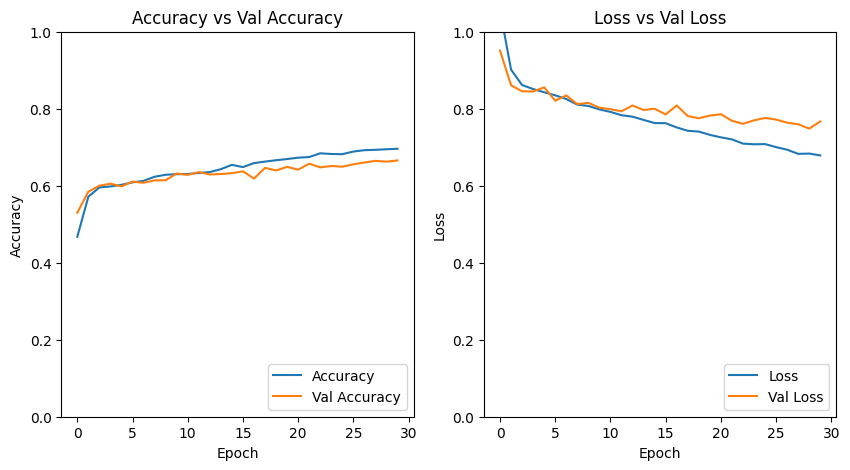

In [ ]:
# ---------------------------------------------------
plt.figure(figsize=(10,5))
# 1. Visualizamos Accuracy y val_Acurracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Val Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Accuracy', 'Val Accuracy'], loc='lower right')

# 1. Visualizamos loss y val_loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Val Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
#plt.xlim([0, 15])
plt.legend(['Loss', 'Val Loss'], loc='lower right')


95/95 [==============================] - 0s 908us/step
Accuracy: 0.6655629139072847
Precision: 0.667250109507528
Recall: 0.6655629139072847
F1 Score: 0.6615391903491632
Classification Error: 0.3344370860927153
Matriz de confusión test:


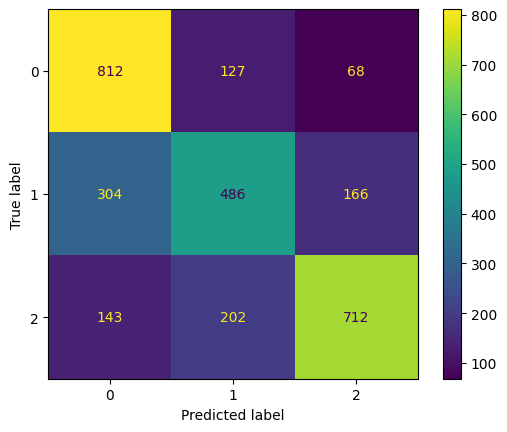

In [ ]:
y_test_pred = model3.predict(X_test)

y_pred_classes = np.argmax(y_test_pred, axis=1)

#METRICAS EVALUADAS
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_classes, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred_classes, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("F1 Score:", f1)

#logloss = log_loss(y_test, model3.predict_proba(X_test))
#print("Log Loss:", logloss)

# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)


confusion = confusion_matrix(y_test, y_pred_classes)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)

In [ ]:
#VALIDACION CRUZADA

model3 = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

x_standar_reset = df_synthetic.drop(['y'], axis=1).reset_index(drop=True)
y_reset = df_synthetic['y'].reset_index(drop=True)

skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(df_synthetic.drop(['y'], axis=1), df_synthetic['y'])
foldNum=0

accuracy_scores = []  # Lista para almacenar los valores de accuracy
precision_scores = []  # Lista para almacenar los valores de precisión
recall_scores = [] # Lista para almacenar los valores de recall
sensitivity_scores = []  # Lista para almacenar los valores de sensibilidad


for train_index, val_index in skf.split(df_synthetic.drop(['y'], axis=1),df_synthetic['y']):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = df_synthetic.drop(['y'], axis=1).iloc[train_index,:], df_synthetic.drop(['y'], axis=1).iloc[val_index,:]
    Y_train, Y_val = df_synthetic['y'].iloc[train_index], df_synthetic['y'].iloc[val_index]

    model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model3.fit(X_train, Y_train,
                        validation_data = (X_val, Y_val),
                        epochs=30,
                        batch_size=64)
    yPredict = model3.predict(X_val)
    test_loss, test_acc = model3.evaluate(X_val, Y_val)
    print('Model Evaluate Loss:      ', test_loss)
    print('Model Evaluate Accuracy:  ', test_acc)


    y_pred_classes = np.argmax(yPredict, axis=1)  # Convertir las probabilidades a clases predichas
    accuracy_scores.append(test_acc)
    precision_scores.append(precision_score(Y_val, y_pred_classes, average='weighted'))
    recall_scores.append(recall_score(Y_val, y_pred_classes, average='weighted'))
    sensitivity_scores.append(f1_score(Y_val, y_pred_classes, average='weighted'))

print("Accuracy  Media : ", np.mean(accuracy_scores))
print("Precision Media  : ", np.mean(precision_scores))
print("Recall Media : ", np.mean(recall_scores))
print("F1 score Media : ", np.mean(sensitivity_scores))


# Calcular el error de clasificación
classification_error = 1 - accuracy
print("Classification Error:", classification_error)

Results for fold 1
Epoch 1/30
170/170 [==============================] - 3s 6ms/step - loss: 1.0804 - accuracy: 0.4517 - val_loss: 0.9339 - val_accuracy: 0.5447
Epoch 2/30
170/170 [==============================] - 0s 3ms/step - loss: 0.9057 - accuracy: 0.5798 - val_loss: 0.8619 - val_accuracy: 0.5952
Epoch 3/30
170/170 [==============================] - 1s 3ms/step - loss: 0.8518 - accuracy: 0.6042 - val_loss: 0.8439 - val_accuracy: 0.6035
Epoch 4/30
170/170 [==============================] - 0s 3ms/step - loss: 0.8377 - accuracy: 0.6111 - val_loss: 0.8140 - val_accuracy: 0.6374
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 0.8261 - accuracy: 0.6189 - val_loss: 0.8034 - val_accuracy: 0.6391
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 0.8165 - accuracy: 0.6230 - val_loss: 0.7924 - val_accuracy: 0.6523
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.6316 - val_loss: 0.7879 - val_accu

Matriz de confusión test:


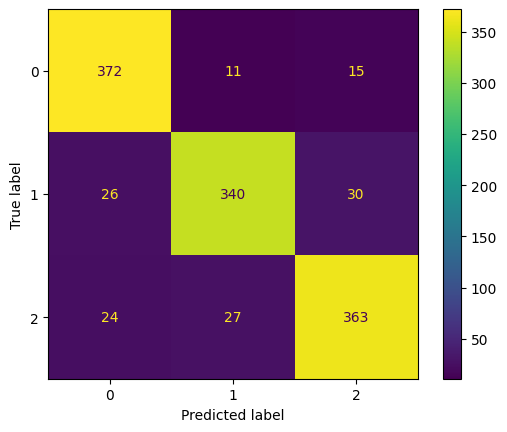

In [ ]:
#MATRIZ DE CONFUSIÓN
confusion = confusion_matrix(Y_val, y_pred_classes)
confusion2=ConfusionMatrixDisplay(confusion).plot()
print("Matriz de confusión test:\n", confusion2)

### EVALUACIÓN KNN

In [ ]:
# Entrenar el modelo
model4.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model4.predict(X_test)




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)

# Obtener las etiquetas de las clases
class_labels = np.unique(y_test)

# Crear una figura y un eje para la matriz de confusión
fig, ax = plt.subplots()

# Crear la matriz de confusión con colores
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Establecer etiquetas de los ejes x e y
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Establecer el título del gráfico
ax.set_title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

# Suponiendo que tienes predicciones llamadas y_pred
precision = precision_score(y_test, y_pred, average='macro')
print("precision:")
print(precision)

NameError: ignored

In [ ]:
# Etiquetas de las métricas
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Valores de las métricas
values = [accuracy, precision, recall, f1]

# Crea el gráfico de barras
plt.bar(labels, values)
plt.ylabel('Score')
plt.title('Rendimiento del modelo k-NN')

# Muestra el gráfico
plt.show()

### EVALUACIÓN K-MEANS


In [ ]:

labels = kmeans.fit_predict(X_train)


test_labels = kmeans.predict(X_test)

silhouette_avg = silhouette_score(X_test, test_labels)
sample_silhouette_values = silhouette_samples(X_test, test_labels)

# Configura los subplots
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Rango para las barras del gráfico
y_lower = 10

# Itera sobre los clusters para generar el gráfico
for i in range(k):
    # Selecciona las puntuaciones de silueta para el cluster i
    ith_cluster_silhouette_values = \
        sample_silhouette_values[test_labels == i]

    # Ordena las puntuaciones de silueta del cluster i
    ith_cluster_silhouette_values.sort()

    # Calcula el tamaño de la barra
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colorea las barras según el cluster
    color = plt.cm.get_cmap("Spectral")(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiqueta del cluster en el gráfico
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Actualiza el rango para las próximas barras
    y_lower = y_upper + 10

# Configura el gráfico
ax1.set_title("Gráfico de Silueta (Datos de Prueba)")
ax1.set_xlabel("Coeficiente de Silueta")
ax1.set_ylabel("Etiqueta de Cluster")

# Clasificación ficticia con Random Forest

In [ ]:
model2.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)


#accuracy:
accuracy_test=accuracy_score(y_test, y_test_pred)


print(accuracy_test)

y_train_pred = model2.predict(X_train)

X_train2['pred']=y_train_pred
X_test2['pred']=y_test_pred

y_pred_model=np.concatenate([X_train2, X_test2], axis=0)

columns = list(X_train2.columns)
y_pred_model = pd.DataFrame(y_pred_model, columns=columns)

print(y_pred_model)

0.890728476821192
             HS        AS       HST       AST        HF        AF        HC  \
0     -0.282253  0.760343  0.857000  0.118613  0.254551 -0.887614 -0.901330   
1     -0.483415 -0.599911 -1.061931  0.118613 -1.858468 -0.651324 -0.901330   
2      0.321234 -0.373202  0.473214 -1.248487  0.958890 -0.415034 -0.558075   
3      1.125884 -0.373202  0.857000 -0.337087 -0.919349  1.475287  0.814941   
4      0.723559 -0.146493  0.473214 -0.337087  0.489331  0.057546  0.128433   
...         ...       ...       ...       ...       ...       ...       ...   
12075 -0.971062 -0.421281 -0.678145 -0.217401 -0.819768 -0.899564  1.338502   
12076 -1.161785 -0.202422 -0.581776  1.485713  1.663230  0.824709 -1.243073   
12077  0.723559  0.533634  1.240786 -0.792787 -0.215009 -1.596485 -0.558075   
12078  0.924722 -0.373202  0.857000 -1.248487  0.724111 -0.651324 -0.558075   
12079  0.120072 -1.053329 -0.294358 -0.337087 -0.449789  0.293836  1.844704   

             AC        HY        

In [ ]:
data_modelo=y_pred_model.loc[y_pred_model['ficticio']==0.0]

data_modelo = pd.merge(data_modelo, data_mod[['HomeTeam','AwayTeam','Season','Home','Away','Temporada']], on=['Home', 'Away', 'Temporada'], how='left')

print(data_modelo)



            HS        AS       HST       AST        HF        AF        HC  \
0    -0.282253  0.760343  0.857000  0.118613  0.254551 -0.887614 -0.901330   
1     1.125884 -0.373202  0.857000 -0.337087 -0.919349  1.475287  0.814941   
2     0.723559 -0.146493  0.473214 -0.337087  0.489331  0.057546  0.128433   
3     0.924722 -0.146493 -0.678145 -0.337087 -0.449789  1.947867  0.471687   
4    -0.081091  0.080216 -1.061931 -1.248487 -0.449789  0.766417  0.471687   
...        ...       ...       ...       ...       ...       ...       ...   
4175  1.729371 -0.826620 -0.294358 -0.337087  1.193670 -0.178744  0.471687   
4176  0.120072 -0.373202  0.089428 -0.337087  0.958890 -1.596485 -1.931092   
4177  0.723559  2.347307  0.089428  2.397113 -1.154128 -1.123904  0.128433   
4178  0.120072  0.533634  0.089428  0.118613  0.254551  0.766417  0.471687   
4179  0.924722 -0.373202  0.857000 -1.248487  0.724111 -0.651324 -0.558075   

            AC        HY        AY        HR        AR  Home  A

In [ ]:
#matriz de confusion con la prediccion entrenada con data aumenation y los resultados reales


confusion = confusion_matrix(y, data_modelo['pred'])
print("Matriz de confusión test:\n", confusion)



Matriz de confusión test:
 [[326 308 554]
 [330 248 479]
 [532 499 904]]


In [ ]:

#se calculan las puntuacion a aprtir de las predicciones hechas


data_modelo['PuntosHome'] = ''

for index, row in data_modelo.iterrows():
    if row['pred'] == 0:
        data_modelo.at[index, 'PuntosHome'] = 0
    elif row['pred'] == 1:
        data_modelo.at[index, 'PuntosHome'] = 1
    else:
        data_modelo.at[index, 'PuntosHome'] = 3



data_modelo['PuntosAway'] = ''

for index, row in data_modelo.iterrows():
    if row['pred'] == 0:
        data_modelo.at[index, 'PuntosAway'] = 3
    elif row['pred'] == 1:
        data_modelo.at[index, 'PuntosAway'] = 1
    else:
        data_modelo.at[index, 'PuntosAway'] = 0


#siempre fijandonos en home
data_modelo['PG'] = ''
data_modelo['PE'] = ''
data_modelo['PP'] = ''

for index, row in data_modelo.iterrows():
    if row['pred'] == 0:
        data_modelo.at[index, 'PG'] = 1
        data_modelo.at[index, 'PE'] = 0
        data_modelo.at[index, 'PP'] = 0
    elif row['pred'] == 1:
        data_modelo.at[index, 'PG'] = 0
        data_modelo.at[index, 'PE'] = 1
        data_modelo.at[index, 'PP'] = 0
    else:
        data_modelo.at[index, 'PG'] = 0
        data_modelo.at[index, 'PE'] = 0
        data_modelo.at[index, 'PP'] = 1


# Imprimir el DataFrame resultante
print(data_modelo)

            HS        AS       HST       AST        HF        AF        HC  \
0    -0.282253  0.760343  0.857000  0.118613  0.254551 -0.887614 -0.901330   
1     1.125884 -0.373202  0.857000 -0.337087 -0.919349  1.475287  0.814941   
2     0.723559 -0.146493  0.473214 -0.337087  0.489331  0.057546  0.128433   
3     0.924722 -0.146493 -0.678145 -0.337087 -0.449789  1.947867  0.471687   
4    -0.081091  0.080216 -1.061931 -1.248487 -0.449789  0.766417  0.471687   
...        ...       ...       ...       ...       ...       ...       ...   
4175  1.729371 -0.826620 -0.294358 -0.337087  1.193670 -0.178744  0.471687   
4176  0.120072 -0.373202  0.089428 -0.337087  0.958890 -1.596485 -1.931092   
4177  0.723559  2.347307  0.089428  2.397113 -1.154128 -1.123904  0.128433   
4178  0.120072  0.533634  0.089428  0.118613  0.254551  0.766417  0.471687   
4179  0.924722 -0.373202  0.857000 -1.248487  0.724111 -0.651324 -0.558075   

            AC        HY        AY  ...  ficticio  pred    Home

In [ ]:
tabla = pd.DataFrame(data_modelo['pred'].value_counts())

print(tabla)

     pred
2.0  1937
0.0  1188
1.0  1055


In [ ]:
#clasificaicion hecha a través de los resultados obtenidos
home_modelo = data_modelo.groupby(['HomeTeam', 'Season'])['PuntosHome'].sum()

# Imprimir los resultados
print(home_modelo)

away_modelo = data_modelo.groupby(['AwayTeam', 'Season'])['PuntosAway'].sum()

# Imprimir los resultados
print(away_modelo)

partidos = data_modelo.groupby(['HomeTeam', 'Season'])['PG','PP','PE'].sum()

# Imprimir los resultados
print(partidos)


HomeTeam    Season
Alaves      16-17     28
            17-18     31
            18-19     29
            19-20     27
            20-21     24
                      ..
Villarreal  19-20     29
            20-21     30
            21-22     38
Zaragoza    11-12     31
            12-13     20
Name: PuntosHome, Length: 220, dtype: object
AwayTeam    Season
Alaves      16-17     26
            17-18     19
            18-19     21
            19-20     15
            20-21     14
                      ..
Villarreal  19-20     28
            20-21     28
            21-22     23
Zaragoza    11-12     15
            12-13     15
Name: PuntosAway, Length: 220, dtype: object
                   PG  PP  PE
HomeTeam   Season            
Alaves     16-17    5   7   7
           17-18    8  10   1
           18-19    4   7   8
           19-20    6   7   6
           20-21    7   6   6
...                ..  ..  ..
Villarreal 19-20    6   8   5
           20-21    5   8   6
           21-22    3 

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [ ]:
# Combinar los resultados de HomeTeam y AwayTeam
total_scores = home_modelo.add(away_modelo, fill_value=0)

print(total_scores)


HomeTeam    Season
Alaves      16-17     54
            17-18     50
            18-19     50
            19-20     42
            20-21     38
                      ..
Villarreal  19-20     57
            20-21     58
            21-22     61
Zaragoza    11-12     46
            12-13     35
Length: 220, dtype: object


ValueError: ignored

In [ ]:
total_scores.to_excel('/content/tfm-unir-futbol/datasets/puntuaciones_ficticias.xlsx', index=True)

In [ ]:
url='/content/tfm-unir-futbol/visualizacion/datasets/puntuaciones_ficticias.xlsx'

ficticia=pd.read_excel(url)
ficticia.head(5)

ficticia_tot=pd.merge(ficticia, partidos, on=['HomeTeam', 'Season'], how='left')
print(ficticia_tot)

       HomeTeam Season  Puntos_ficticios  PG  PP  PE
0        Alaves  16-17                54   5   7   7
1        Alaves  17-18                50   8  10   1
2        Alaves  18-19                50   4   7   8
3        Alaves  19-20                42   6   7   6
4        Alaves  20-21                38   7   6   6
..          ...    ...               ...  ..  ..  ..
215  Villarreal  19-20                57   6   8   5
216  Villarreal  20-21                58   5   8   6
217  Villarreal  21-22                61   3  11   5
218    Zaragoza  11-12                46   6   9   4
219    Zaragoza  12-13                35   9   5   5

[220 rows x 6 columns]


In [ ]:
url='/content/tfm-unir-futbol/visualizacion/datasets/clasificacionesLaLiga_MERGE_2011-2022.csv'

real=pd.read_csv(url)
real.head(5)

In [ ]:
unidos = pd.merge(real, ficticia, on=['team', 'Season'], how='left')

print(unidos)

In [ ]:
unidos.to_excel('/content/tfm-unir-futbol/datasets/comparacion_puntos.xlsx', index=True)